# Main Code 

# packages Importation

In [1]:
from Prediction import ClassModel as md
from Prediction import DataCollection as dc
import pandas as pd

### import data from Project package

In [13]:
df = dc.Data().impo()
df.head(10)

,Time,Consommation (MW),Gaz (MW),Nucléaire (MW)
0,2019-01-01 00:00:00,64207.0,3430.0,55577.0
1,2019-01-01 00:15:00,63684.5,3229.5,55894.0
2,2019-01-01 00:30:00,63162.0,3029.0,56211.0
3,2019-01-01 00:45:00,62042.5,2943.5,55625.0
4,2019-01-01 01:00:00,60923.0,2858.0,55039.0
5,2019-01-01 01:15:00,60826.0,2862.0,55154.0
6,2019-01-01 01:30:00,60729.0,2866.0,55269.0
7,2019-01-01 01:45:00,60428.0,2845.5,55109.5
8,2019-01-01 02:00:00,60127.0,2825.0,54950.0
9,2019-01-01 02:15:00,59786.5,2828.5,54998.5


### Siting the "Time" variable as index in convert it into a data time 

In [23]:
df.set_index("Time", inplace = True)

In [49]:
df.index = pd.to_datetime(df.index)
df.head(5)

,Consommation (MW),Gaz (MW),Nucléaire (MW)
Time,,,
2019-01-01 00:00:00,64207.0,3430.0,55577.0
2019-01-01 00:15:00,63684.5,3229.5,55894.0
2019-01-01 00:30:00,63162.0,3029.0,56211.0
2019-01-01 00:45:00,62042.5,2943.5,55625.0
2019-01-01 01:00:00,60923.0,2858.0,55039.0


### Calling the Dos class and creating featurs by calling the "createFeatures()" method

In [50]:
Model = md.Dos(df, 0)  
Featurs = Model.createFeatures()
Featurs

,Consommation (MW),Gaz (MW),Nucléaire (MW),minute,dayofweek,month,year,dayofyear,dayofmonth,lag1,lag2,lag3
Time,,,,,,,,,,,,
2019-01-01 00:00:00,64207.0,3430.0,55577.0,0,1,1,2019,1,1,NaN,NaN,NaN
2019-01-01 00:15:00,63684.5,3229.5,55894.0,15,1,1,2019,1,1,NaN,NaN,NaN
2019-01-01 00:30:00,63162.0,3029.0,56211.0,30,1,1,2019,1,1,NaN,NaN,NaN
2019-01-01 00:45:00,62042.5,2943.5,55625.0,45,1,1,2019,1,1,NaN,NaN,NaN
2019-01-01 01:00:00,60923.0,2858.0,55039.0,0,1,1,2019,1,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-03 11:45:00,64728.0,7652.0,36010.0,45,5,12,2022,337,3,66162.5,52560.0,55452.0
2022-12-03 12:00:00,65055.0,7846.0,36053.0,0,5,12,2022,337,3,66775.0,52768.0,55976.0
2022-12-03 12:15:00,65026.0,7971.0,36084.0,15,5,12,2022,337,3,67446.5,52454.0,55930.0


In [ ]:
### Fiting the model by c

In [42]:
reg = Model.fitModel()

[23:17:48] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:52778.54847
[100]	validation_0-rmse:19801.87166
[200]	validation_0-rmse:8266.22132
[300]	validation_0-rmse:4801.38859
[400]	validation_0-rmse:4012.81692
[499]	validation_0-rmse:3825.82985


In [45]:
dayPred, date = Model.DayPred(2022,12,8,reg)
dayPred

,Date,Heure,Consommation (MW)
0,2022-12-08,00:00,62485.835938
1,2022-12-08,00:15,62046.429688
2,2022-12-08,00:30,59981.953125
3,2022-12-08,00:45,58877.906250
4,2022-12-08,01:00,58543.164062
...,...,...,...
91,2022-12-08,22:45,64845.078125
92,2022-12-08,23:00,64616.890625
93,2022-12-08,23:15,64469.445312
94,2022-12-08,23:30,64469.445312


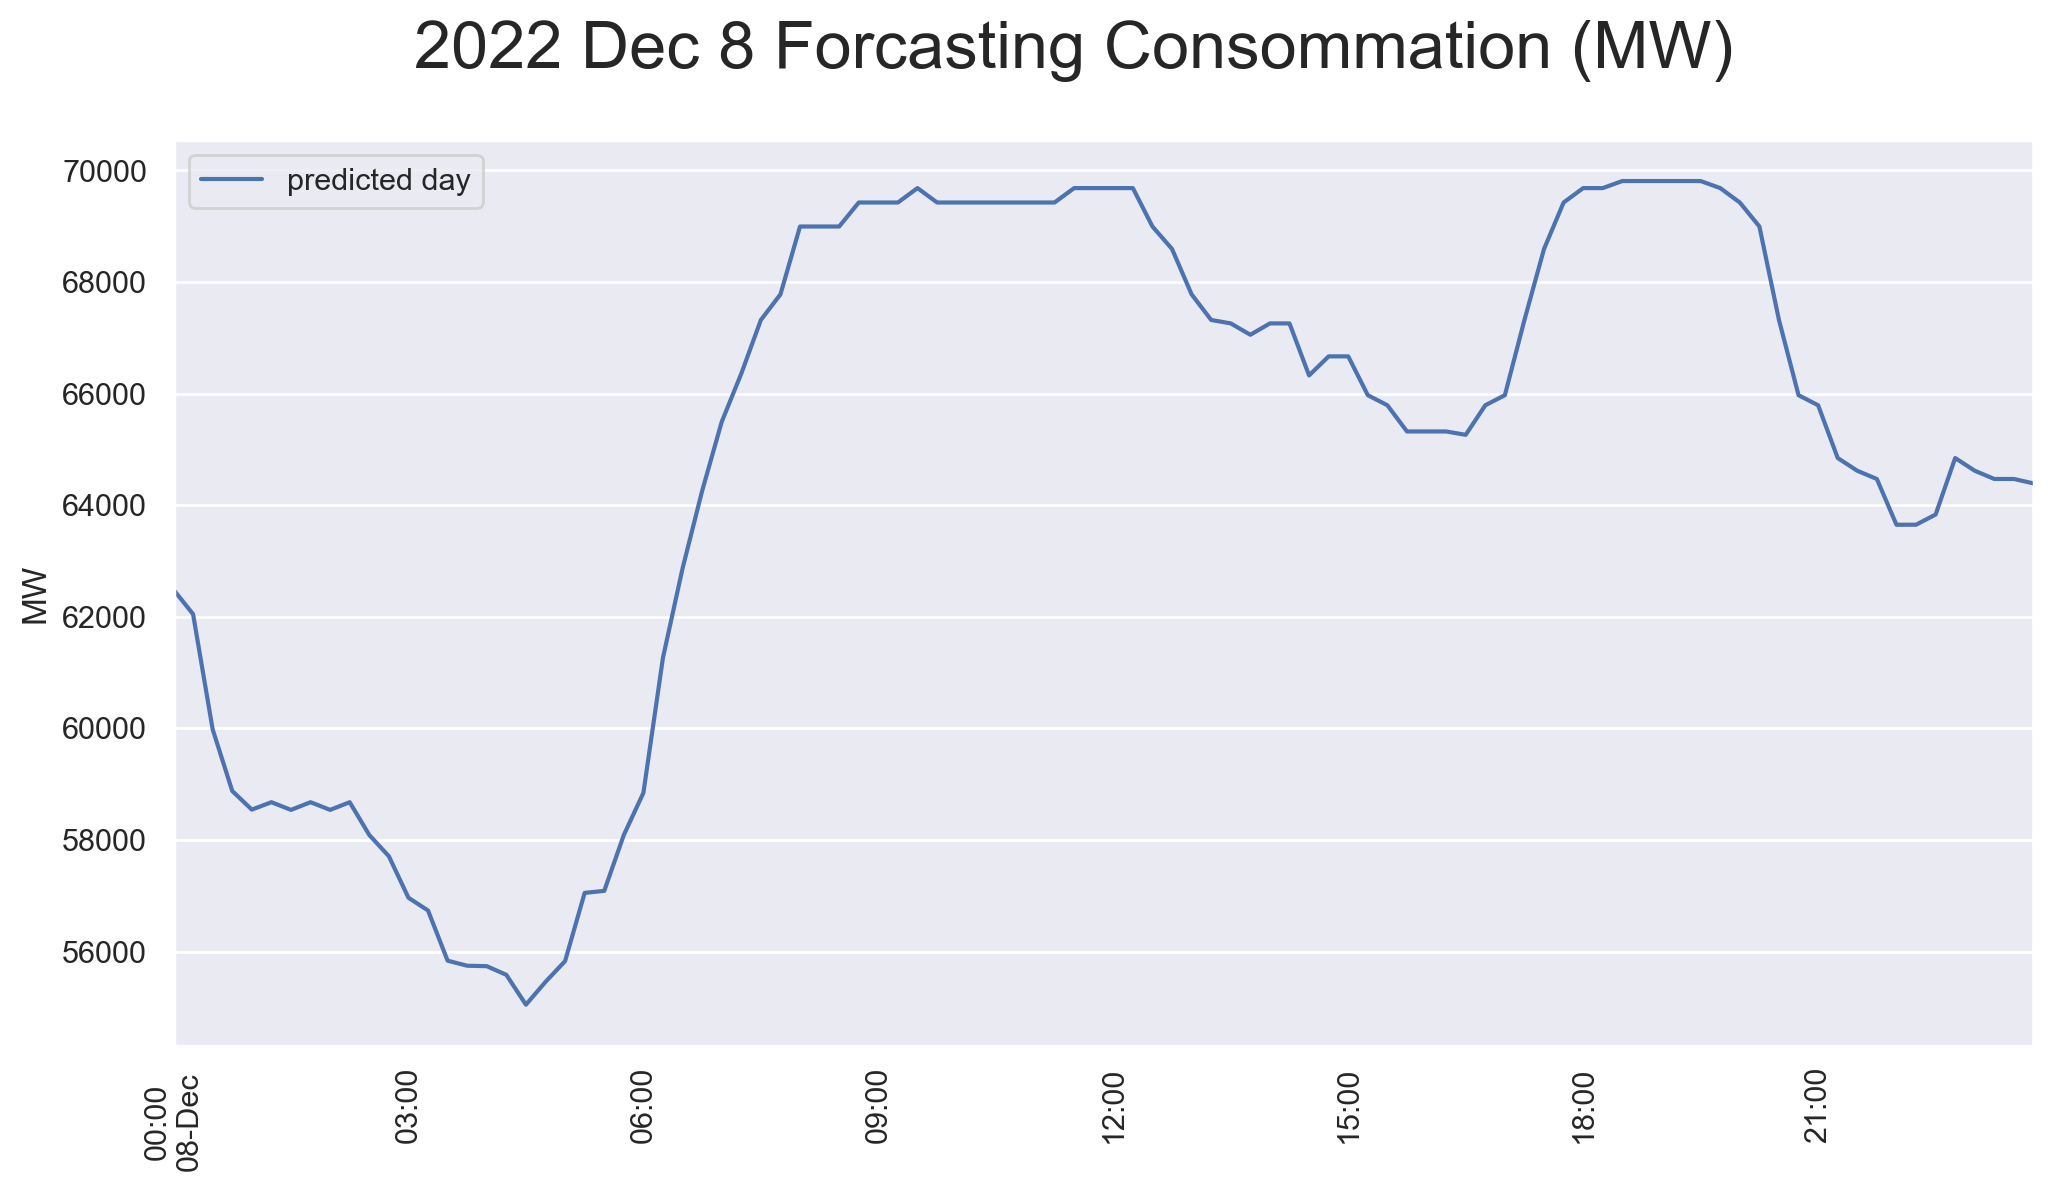

In [48]:
Model.plot(dayPred,date)